In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

## Species Dataset

In [2]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [3]:
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [4]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
print(species.category.unique())
print(species.conservation_status.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [6]:
species.duplicated().value_counts()

False    5824
dtype: int64

In [7]:
species.duplicated(subset=['scientific_name']).value_counts()

False    5541
True      283
dtype: int64

In [8]:
species.duplicated(subset=['common_names']).value_counts()

False    5504
True      320
dtype: int64

## Visualizing Duplicates

I want to visualize the duplicated rows, especially those that contain conservation status data to ensure there will be no information lost when the duplicates are dropped. I know the common names are not consistent across duplicates in the scientific name, so I can only assume the conservation data may also have inconsistencies across duplicates of a species. 

In [9]:
duplicates = species.duplicated(subset=['scientific_name'],keep=False)
print(duplicates)

0       False
1       False
2       False
3       False
4        True
        ...  
5819    False
5820    False
5821    False
5822    False
5823    False
Length: 5824, dtype: bool


In [10]:
duplicates_list = []
for i in range(len(duplicates)):
    if duplicates[i] == True:
        duplicates_list.append(duplicates.loc[[i]])

In [11]:
duplicates_list_df = pd.concat(duplicates_list).reset_index()

In [12]:
duplicates_index = duplicates_list_df['index'].tolist()

In [13]:
duplicates_rows = []
for index in duplicates_index:
    data = species.iloc[[index]]
    duplicates_rows.append(data)

In [14]:
duplicates_rows_df = pd.concat(duplicates_rows).sort_values('scientific_name')

In [15]:
duplicates_rows_df_dropped = duplicates_rows_df.dropna(subset='conservation_status')
duplicates_rows_df_dropped

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
3035,Mammal,Eptesicus fuscus,"Big Brown Bat, Big Brown Bat",Species of Concern
3150,Bird,Gavia immer,"Common Loon, Great Northern Diver, Great North...",Species of Concern
172,Bird,Gavia immer,Common Loon,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
3037,Mammal,Lasionycteris noctivagans,"Silver-Haired Bat, Silver-Haired Bat",Species of Concern
4465,Mammal,Myotis californicus,California Myotis,Species of Concern


In [16]:
species[species.scientific_name == 'Oncorhynchus mykiss']

,category,scientific_name,common_names,conservation_status
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


### Findings

Now I can see that ***Canus lupus*** is marked as endangered in two rows and in recovery in a third. This would require verification to determine the most accurate conservation status for this species before the rows can be dropped.

I also see that only one ***Oncorhynchus mykiss*** record is present in my duplicates with conservation status data frame, so I went looking for the other in the full species data set and found a second instance with no conservation data. This would also need to be verified for accuracy.

For this analysis, I will err on the side of caution and assume the species mentioned above are at risk and therefore drop the in recovery (index 3020) and blank conservation status (index 560) rows for the respective species. 

Apart from this, I am satisfied that no information will be lost by dropping duplicates in scientific_name.

In [17]:
species = species.drop([3020, 560])

In [18]:
species.duplicated(subset=['scientific_name']).value_counts()

False    5541
True      281
dtype: int64

In [19]:
species = species.drop_duplicates(subset=['scientific_name'])
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


Now I see there are 5541 rows in the data frame - equal to the number of unique values in the 'scientific_name' variable.

## Creating Genus Variable

It may be helpful later in the analysis to have a variable containing only the genus of the species

In [20]:
string_split = species['scientific_name'].str.split(' ')
species['genus'] = string_split.str.get(0)
species = species[['category', 'scientific_name', 'genus', 'conservation_status']]

In [21]:
species.head(10)

,category,scientific_name,genus,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Clethrionomys,NaN
1,Mammal,Bos bison,Bos,NaN
2,Mammal,Bos taurus,Bos,NaN
3,Mammal,Ovis aries,Ovis,NaN
4,Mammal,Cervus elaphus,Cervus,NaN
5,Mammal,Odocoileus virginianus,Odocoileus,NaN
6,Mammal,Sus scrofa,Sus,NaN
7,Mammal,Canis latrans,Canis,Species of Concern
8,Mammal,Canis lupus,Canis,Endangered
9,Mammal,Canis rufus,Canis,Endangered


In [22]:
unique_genus = species.groupby('category').nunique().reset_index()
unique_genus = unique_genus[['category', 'scientific_name','genus']]
unique_genus

,category,scientific_name,genus
0,Amphibian,79,25
1,Bird,488,231
2,Fish,125,53
3,Mammal,176,83
4,Nonvascular Plant,333,154
5,Reptile,78,38
6,Vascular Plant,4262,1013


This table shows the number of unique genera as compared to the number of unique species within each category.

## Exploratory Data Analysis

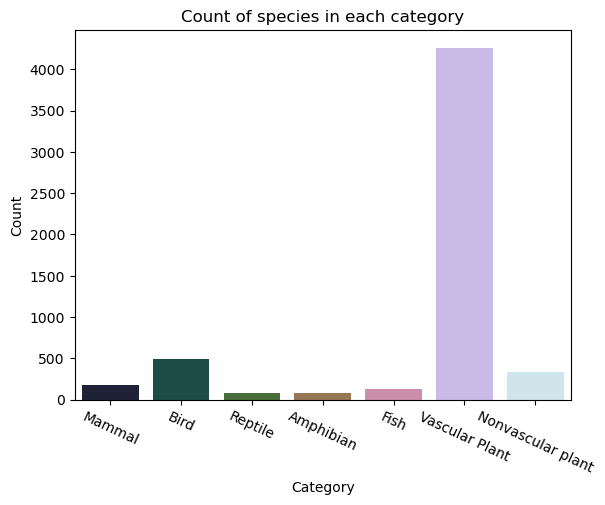

In [23]:
sns.countplot(data = species, x ='category', palette='cubehelix')
plt.title('Count of species in each category')
plt.xlabel('Category')
ax = plt.subplot()
ax.set_xticklabels(labels = ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular plant'],rotation = -25)
plt.ylabel('Count')
plt.show()
plt.close()

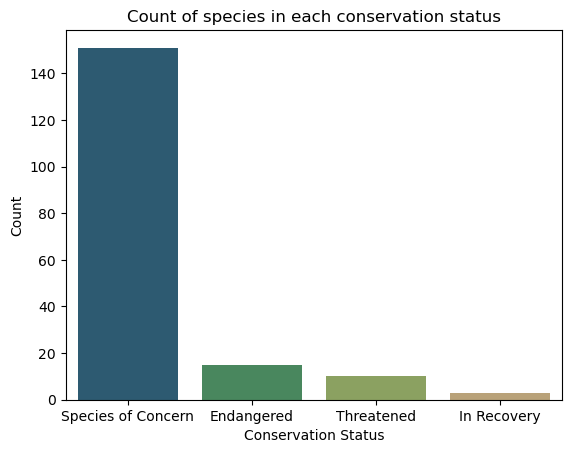

In [24]:
sns.countplot(data = species, x ='conservation_status', palette='gist_earth')
plt.title('Count of species in each conservation status')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()
plt.close()

In [25]:
conservation_bycat = pd.crosstab(species.conservation_status, species.category)
conservation_bycat

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,6,0,0,1
In Recovery,0,3,0,0,0,0,0
Species of Concern,4,68,4,22,5,5,43
Threatened,2,0,4,2,0,0,2


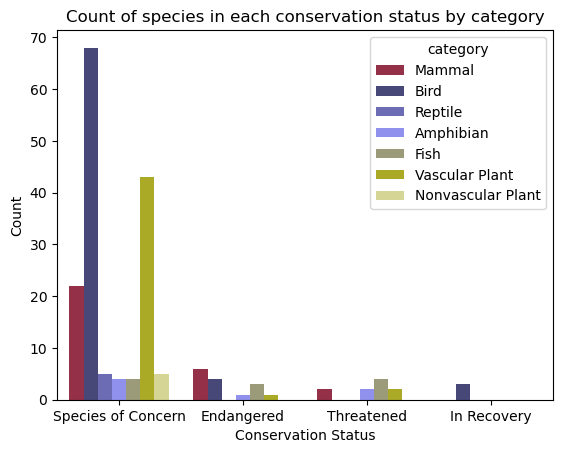

In [26]:
sns.countplot(data = species, x ='conservation_status', hue='category', palette='gist_stern')
plt.title('Count of species in each conservation status by category')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()
plt.close()

In [27]:
species.conservation_status.fillna('No Intervention',inplace=True)

/var/folders/6c/sgj71hqd525009qs_c8z6ty00000gn/T/ipykernel_90359/4231124618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species.conservation_status.fillna('No Intervention',inplace=True)


In [28]:
species['at_risk'] = np.where(species.conservation_status == 'No Intervention', 0, 1)
species.head(10)

,category,scientific_name,genus,conservation_status,at_risk
0,Mammal,Clethrionomys gapperi gapperi,Clethrionomys,No Intervention,0
1,Mammal,Bos bison,Bos,No Intervention,0
2,Mammal,Bos taurus,Bos,No Intervention,0
3,Mammal,Ovis aries,Ovis,No Intervention,0
4,Mammal,Cervus elaphus,Cervus,No Intervention,0
5,Mammal,Odocoileus virginianus,Odocoileus,No Intervention,0
6,Mammal,Sus scrofa,Sus,No Intervention,0
7,Mammal,Canis latrans,Canis,Species of Concern,1
8,Mammal,Canis lupus,Canis,Endangered,1
9,Mammal,Canis rufus,Canis,Endangered,1


In [29]:
Xtab = pd.crosstab(species.category, species.at_risk)
Xtab

at_risk,0,1
category,,
Amphibian,72,7
Bird,413,75
Fish,114,11
Mammal,146,30
Nonvascular Plant,328,5
Reptile,73,5
Vascular Plant,4216,46


In [30]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(Xtab)

print('p-value: ' + str(pval) + '\n')
expected_df = pd.DataFrame(expected)
expected_df['category'] = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']
expected_df.rename(columns = {0:'no_risk', 1:'at_risk'},inplace=True)
expected_df = expected_df[['category', 'no_risk', 'at_risk']]
print('expected contingency table if there was no association between category and risk status:')
round(expected_df,0)

p-value: 5.146759135430123e-89

expected contingency table if there was no association between category and risk status:


,category,no_risk,at_risk
0,Amphibian,76.0,3.0
1,Bird,472.0,16.0
2,Fish,121.0,4.0
3,Mammal,170.0,6.0
4,Nonvascular Plant,322.0,11.0
5,Reptile,75.0,3.0
6,Vascular Plant,4124.0,138.0


### Based on the results of this chi-square test at a significance level of  0.05 , I can conclude there is an association between species category and risk status. 
This means that the categories show a difference in the rate of species at risk as compared to the other categories.

In [31]:
proportions = Xtab.reset_index()
proportions.columns = ['category', 'no_risk', 'at_risk']
proportions['proportion_within_cat'] = np.round(proportions.at_risk /(proportions.at_risk + proportions.no_risk),3)
proportions['proportion_between_cat'] = np.round(proportions.at_risk /species.at_risk.sum(),3)
proportions

,category,no_risk,at_risk,proportion_within_cat,proportion_between_cat
0,Amphibian,72,7,0.089,0.039
1,Bird,413,75,0.154,0.419
2,Fish,114,11,0.088,0.061
3,Mammal,146,30,0.170,0.168
4,Nonvascular Plant,328,5,0.015,0.028
5,Reptile,73,5,0.064,0.028
6,Vascular Plant,4216,46,0.011,0.257


In [32]:
species.groupby('genus').sum('at_risk').sort_values('at_risk', ascending=False)

,at_risk
genus,
Myotis,12
Falco,4
Rana,3
Canis,3
Oncorhynchus,2
...,...
Erysimum,0
Eryngium,0
Erodium,0


The genus with the most number of at risk species is Myotis - mouse eared bats, with 3 times as many species as the next most at risk genus.

## Observations Dataset

In [33]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [34]:
observations.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [35]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [36]:
observations.duplicated().value_counts()

False    23281
True        15
dtype: int64

In [37]:
observations = observations.drop_duplicates()

In [38]:
observations.park_name.value_counts()

Bryce National Park                    5823
Yosemite National Park                 5821
Yellowstone National Park              5819
Great Smoky Mountains National Park    5818
Name: park_name, dtype: int64

## Exploratory Data Analysis

In [39]:
obs = observations.observations.sum()
print('total number of observations: ' + str(obs))

total number of observations: 3312429


In [40]:
park_obs = observations.groupby('park_name').sum('observations').sort_values(by='observations', ascending=False).reset_index()
park_obs

,park_name,observations
0,Yellowstone National Park,1442314
1,Yosemite National Park,862836
2,Bryce National Park,575901
3,Great Smoky Mountains National Park,431378


In [41]:
park_obs['proportion']=round(park_obs.observations/observations.observations.sum(),3)
park_obs

,park_name,observations,proportion
0,Yellowstone National Park,1442314,0.435
1,Yosemite National Park,862836,0.260
2,Bryce National Park,575901,0.174
3,Great Smoky Mountains National Park,431378,0.130


In [42]:
observations.groupby('scientific_name').sum('observations').sort_values(by='observations', ascending=False)

,observations
scientific_name,
Holcus lanatus,1780
Castor canadensis,1725
Hypochaeris radicata,1720
Puma concolor,1711
Procyon lotor,1692
...,...
Rana sierrae,144
Noturus baileyi,143
Vermivora bachmanii,141


The species with the most number of observations across all four parks is Holcus lanatus, which is a type of grass.  <br> <br> The species with the least number of observations across all four parks is Grus americana, known commonly as the whooping crane.

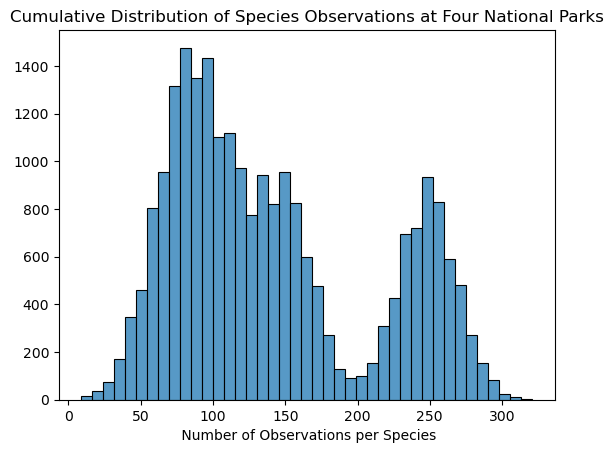

In [43]:
sns.histplot(data=observations, x='observations')
plt.title('Cumulative Distribution of Species Observations at Four National Parks')
plt.ylabel('')
plt.xlabel(' Number of Observations per Species')
plt.show()

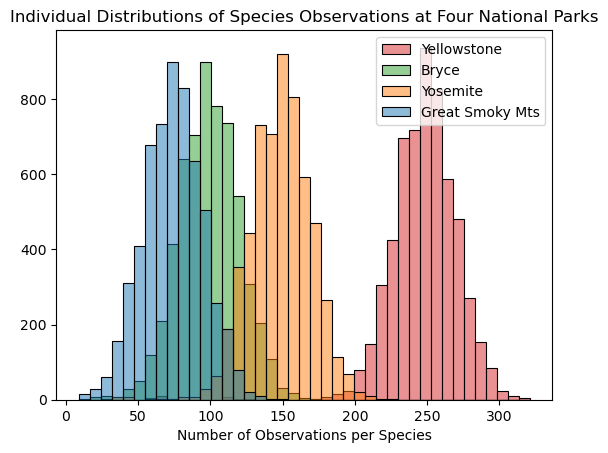

<Figure size 640x480 with 0 Axes>

In [44]:
sns.histplot(data=observations, x='observations', hue='park_name')
plt.title('Individual Distributions of Species Observations at Four National Parks')
plt.ylabel('')
plt.xlabel('Number of Observations per Species')
plt.legend(labels = ['Yellowstone','Bryce','Yosemite','Great Smoky Mts'])
plt.show()
plt.clf()

In [45]:
Bryce_NP = observations.observations[observations.park_name == 'Bryce National Park']
Yosemite_NP  = observations.observations[observations.park_name == 'Yosemite National Park']
Yellowstone_NP = observations.observations[observations.park_name == 'Yellowstone National Park']
GSM_NP = observations.observations[observations.park_name == 'Great Smoky Mountains National Park']

In [46]:
Bryce_mean = Bryce_NP.mean()
print('Bryce National Park mean observations: ' + str(round(Bryce_mean,0)))
Yosemite_mean = Yosemite_NP.mean()
print('Yosemite National Park mean observations: ' + str(round(Yosemite_mean,0)) )
Yellowstone_mean = Yellowstone_NP.mean()
print('Yellowstone National Park mean observations: ' + str(round(Yellowstone_mean,0)))
GSM_mean = GSM_NP.mean()
print('Great Smoky Mountains National Park mean observations: ' + str(round(GSM_mean,0)))

Bryce National Park mean observations: 99.0
Yosemite National Park mean observations: 148.0
Yellowstone National Park mean observations: 248.0
Great Smoky Mountains National Park mean observations: 74.0


In [47]:
Bryce_std = Bryce_NP.std()
print('Bryce National Park standard deviation in observations: ' + str(round(Bryce_std,0)))
Yosemite_std = Yosemite_NP.std()
print('Yosemite National Park standard deviation in observations: ' + str(round(Yosemite_std,0)))
Yellowstone_std = Yosemite_NP.std()
print('Yellowstone National Park standard deviation in observations: ' + str(round(Yellowstone_std,0)))
GSM_std = GSM_NP.std()
print('Great Smoky Mountains National Park standard deviation in observations: ' + str(round(GSM_std,0)))

Bryce National Park standard deviation in observations: 21.0
Yosemite National Park standard deviation in observations: 21.0
Yellowstone National Park standard deviation in observations: 21.0
Great Smoky Mountains National Park standard deviation in observations: 20.0


In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_test = pairwise_tukeyhsd(observations.observations, observations.park_name, 0.05)
print(tukey_test)

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                              group2               meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------------------
                Bryce National Park Great Smoky Mountains National Park -24.7557   0.0  -25.7748 -23.7366   True
                Bryce National Park           Yellowstone National Park 148.9618   0.0  147.9427 149.9808   True
                Bryce National Park              Yosemite National Park  49.3271   0.0   48.3081   50.346   True
Great Smoky Mountains National Park           Yellowstone National Park 173.7175   0.0  172.6982 174.7367   True
Great Smoky Mountains National Park              Yosemite National Park  74.0827   0.0   73.0636  75.1019   True
          Yellowstone National Park              Yosemite National Park -99.6347   0.0 -100.6538

## Findings

The breakdown of distributions of observations by park shows that the level of biodiversity is consistent across all of the parks, as seen by the similar standard deviations which indicates a consistent variability in species across observations in each park. The major difference we can see is that each park has a significant difference in mean observations, ranging from 74 to 248 observations per species.<br> <br>
The results of the Tukey's range test shows the difference in these means is statistically significant at the 0.05 significance threshold - meaning there is an assocaition between the different parks and the number of observations recorded there. However, with such a large sample size this finding is not surprising. In fact the p-value is displayed as 0.0, meaning there is virtually a 0% chance that the differences we see in means is simply due to chance.

In [49]:
species_sn = species.scientific_name.sort_values(ascending=True).reset_index(drop=True)
observations_sn = observations.scientific_name.drop_duplicates().sort_values(ascending=True).reset_index(drop=True)

In [52]:
species_sn.compare(observations_sn)

,self,other


###### From this result I know that all the same species are present in both data sets

In [53]:
merged_data = pd.merge(species, observations, on='scientific_name', how='inner')

In [54]:
merged_data = merged_data[['scientific_name','genus','park_name','observations','category','conservation_status', 'at_risk']]
merged_data.head(10)

,scientific_name,genus,park_name,observations,category,conservation_status,at_risk
0,Clethrionomys gapperi gapperi,Clethrionomys,Bryce National Park,130,Mammal,No Intervention,0
1,Clethrionomys gapperi gapperi,Clethrionomys,Yellowstone National Park,270,Mammal,No Intervention,0
2,Clethrionomys gapperi gapperi,Clethrionomys,Great Smoky Mountains National Park,98,Mammal,No Intervention,0
3,Clethrionomys gapperi gapperi,Clethrionomys,Yosemite National Park,117,Mammal,No Intervention,0
4,Bos bison,Bos,Yosemite National Park,128,Mammal,No Intervention,0
5,Bos bison,Bos,Yellowstone National Park,269,Mammal,No Intervention,0
6,Bos bison,Bos,Bryce National Park,68,Mammal,No Intervention,0
7,Bos bison,Bos,Great Smoky Mountains National Park,77,Mammal,No Intervention,0
8,Bos taurus,Bos,Bryce National Park,99,Mammal,No Intervention,0
9,Bos taurus,Bos,Yosemite National Park,124,Mammal,No Intervention,0


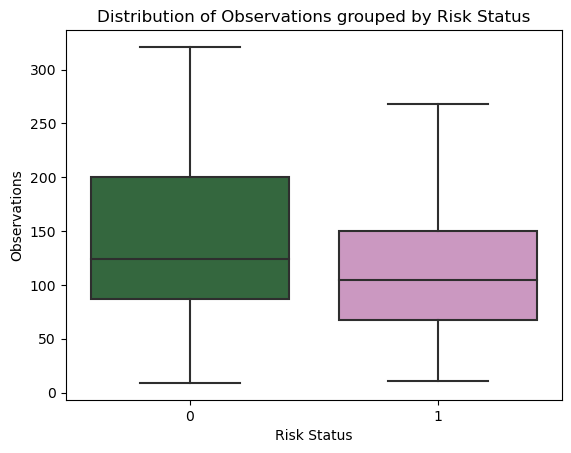

In [55]:
sns.boxplot(data=merged_data, x='at_risk', y='observations', palette = 'cubehelix')
plt.xlabel('Risk Status')
plt.ylabel('Observations')
plt.title('Distribution of Observations grouped by Risk Status')
plt.show()

In [56]:
no_risk = merged_data.observations[merged_data.at_risk == 0]
at_risk = merged_data.observations[merged_data.at_risk == 1]

no_risk_mean = no_risk.mean()
print('Mean observations for species NOT at risk: ' + str(round(no_risk_mean,0)))
at_risk_mean = at_risk.mean()
print('Mean observations for species at risk: ' + str(round(at_risk_mean,0))+ '\n')


from scipy.stats import ttest_ind
tstat, pval = ttest_ind(at_risk, no_risk)
print('p-value: ' + str(pval))

Mean observations for species NOT at risk: 143.0
Mean observations for species at risk: 117.0

p-value: 7.293710926352184e-24


### Based on the results of this two sample t-test at a significance level of 0.05 , I can conclude there is a statistically significant difference between the number of observations of species AT NO risk versus those AT risk in these parks. 

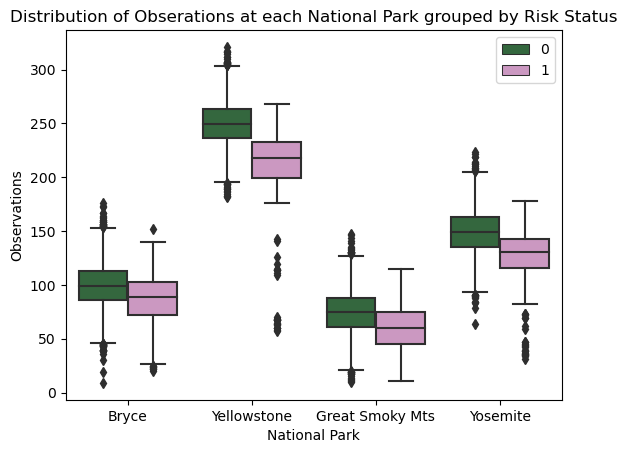

In [57]:
sns.boxplot(data=merged_data, x='park_name', y='observations', hue='at_risk', palette = 'cubehelix')
ax=plt.subplot()
ax.set_xticklabels(['Bryce', 'Yellowstone', 'Great Smoky Mts', 'Yosemite'])
plt.legend()
plt.xlabel('National Park')
plt.ylabel('Observations')
plt.title('Distribution of Obserations at each National Park grouped by Risk Status')
plt.show()

### Findings

Throughout this analysis I have noticed a pattern immerge, being that Yellowstone seems to consistently be the park topping the statistics. For example, it has the most total and most mean observations. The rest of the parks seem to follow the same order for all ranking type statistics as well; Yosemite then Bryce then Great Smoky Mountains.

I find myself wondering what other variables could be at play in this data set, and how would accounting for such a variable affect my results? The most obvious variable to consider would be the size of each park - a larger park likely contains more wildlife.

From the Wikipedia pages for each park, the respective sizes are as follows: <br>
<br>
Yellowstone: 8,983.18 km2 <br>
Yosemite:3,074.1 km2 <br>
Bryce: 145.02 km2 <br>
Great Smoky Mountains: 2,114.15 km2 <br>

As we can see this variable does not explain the whole story. Yellowstone is by far the largest park followed by Yosemite next, but Bryce is very small compared to Great Smoky Mountains, despite having many more observations. Perhaps the location of the parks, which impacts the species of wildlife present in that area, is also a factor.

Again from the Wikipedia pages for the parks, the location of each are as follows: <br>
<br>
Yellowstone is mostly in Wyoming <br>
Yosemite is in California <br>
Bryce is in Utah<br>
Great Smoky Mountains is in Tennesee and North Carolina<br>

![Map](map.jpeg)

From the map above, we can see that Great Smoky Mountains is the outlier on the eastern United States, while the other three parks are on the western side of the country, which definitely has a different climate and ecology. This could be a factor in explaining why Great Smoky Mountains has considerably lower observation numbers despite being a relatively large park, and considerably larger than Bryce. The species that are more abundant in the western United States may be very different from those in the eastern Unites States.